In [1]:
#import os, sys
#from google.colab import drive
#drive.mount('/content/drive')
#nb_path = '/content/notebooks'
#os.symlink('/content/drive/My Drive/Colab Notebooks', nb_path)
#sys.path.insert(0,nb_path)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!pip install ktrain

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.3/25.3 MB 51.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 KB 66.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 266.0/266.0 KB 28.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 107.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 14.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.8/468.8 KB 46.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━

In [4]:
import numpy as np
import pandas as pd
import tensorflow as tf
import ktrain
from ktrain import text

In [5]:
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import  roc_curve, auc, roc_auc_score


In [6]:
#pip install --target=$nb_path ktrain

In [7]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [8]:
data_train = pd.read_csv('/content/drive/MyDrive/ColabData/twitter_2019_2020_pandemi/train.csv')

In [9]:
data_train.head()

,Unnamed: 0,tweet,Subjectivity,Polarity,Analysis
0,0,🇺🇸 tonights sales! 🇺🇸 rare collectibles! ebay ...,0.366667,0.158333,Positive
1,1,"第一商品金地金参考価格(1kg税込) 8:45現在 販売 6,578,000円 買取 6,5...",0.000000,0.000000,Neutral
2,2,🇺🇸 tonights sales! 🇺🇸 rare collectibles! ebay ...,0.366667,0.158333,Positive
3,3,🇺🇸 tonights sales! 🇺🇸 rare collectibles! ebay ...,0.366667,0.158333,Positive
4,4,gbpusd gbpchf us100 nasdac gbpnzd gbpcad us30 ...,0.000000,0.000000,Neutral


In [10]:
data_test = pd.read_csv('/content/drive/MyDrive/ColabData/twitter_2019_2020_pandemi/test.csv')

In [11]:
data_test.head()

,Unnamed: 0,tweet,Subjectivity,Polarity,Analysis
0,80000,gbpusd dax nas100 sp500 us30 dow dow30 ger30 x...,0.0,0.0,Neutral
1,80001,babanın oğlu kemal güçlü.. altın ons gram dola...,0.0,0.0,Neutral
2,80002,double qm - xauusd chart,0.0,0.0,Neutral
3,80003,xauusd 4h ⬇️⬇️,0.0,0.0,Neutral
4,80004,btc dax nas100 sp500 us30 dow dow30 ger30 xauu...,0.0,0.0,Neutral


In [12]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
import os
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID";
os.environ["CUDA_VISIBLE_DEVICES"] = "0";

In [13]:
X_train = data_train.tweet.values.astype(str).tolist()
y_train = data_train.Analysis.values.astype(str).tolist()

X_test = data_test.tweet.values.astype(str).tolist()
y_test = data_test.Analysis.values.astype(str).tolist()

In [14]:
len(X_train), len(X_test)

(80000, 15013)

In [15]:
y_test

['Neutral',
 'Neutral',
 'Neutral',
 'Neutral',
 'Neutral',
 'Neutral',
 'Neutral',
 'Neutral',
 'Neutral',
 'Neutral',
 'Neutral',
 'Neutral',
 'Neutral',
 'Neutral',
 'Neutral',
 'Neutral',
 'Neutral',
 'Negative',
 'Neutral',
 'Neutral',
 'Neutral',
 'Neutral',
 'Neutral',
 'Neutral',
 'Neutral',
 'Neutral',
 'Neutral',
 'Neutral',
 'Neutral',
 'Neutral',
 'Neutral',
 'Neutral',
 'Neutral',
 'Neutral',
 'Neutral',
 'Neutral',
 'Neutral',
 'Neutral',
 'Positive',
 'Neutral',
 'Neutral',
 'Neutral',
 'Positive',
 'Neutral',
 'Neutral',
 'Neutral',
 'Neutral',
 'Neutral',
 'Neutral',
 'Neutral',
 'Neutral',
 'Neutral',
 'Neutral',
 'Neutral',
 'Neutral',
 'Neutral',
 'Neutral',
 'Negative',
 'Neutral',
 'Neutral',
 'Neutral',
 'Neutral',
 'Neutral',
 'Neutral',
 'Neutral',
 'Neutral',
 'Neutral',
 'Neutral',
 'Neutral',
 'Neutral',
 'Neutral',
 'Neutral',
 'Neutral',
 'Neutral',
 'Neutral',
 'Neutral',
 'Neutral',
 'Negative',
 'Neutral',
 'Neutral',
 'Neutral',
 'Neutral',
 'Neutral',

In [16]:
# Building model with transformer
model_name = 'distilbert-base-uncased'

trans = text.Transformer(model_name, maxlen=512)

In [17]:
train_data = trans.preprocess_train(X_train, y_train)
test_data = trans.preprocess_test(X_test, y_test)

preprocessing train...
language: en
train sequence lengths:
	mean : 19
	95percentile : 35
	99percentile : 46


Is Multi-Label? False
preprocessing test...
language: en
test sequence lengths:
	mean : 19
	95percentile : 32
	99percentile : 40


In [18]:
# getting distilbert model.
model = trans.get_classifier()

In [19]:
learner = ktrain.get_learner(model, train_data = train_data, val_data = test_data, batch_size = 16)

In [20]:
# learner.lr_find(show_plot=True, max_epochs=10)

In [21]:
history = learner.fit_onecycle(1e-4, 3)



begin training using onecycle policy with max lr of 0.0001...
Epoch 1/3
5000/5000 [==============================] - 624s 120ms/step - loss: 0.0576 - accuracy: 0.9822 - val_loss: 0.5266 - val_accuracy: 0.8967
Epoch 2/3
5000/5000 [==============================] - 612s 120ms/step - loss: 0.0280 - accuracy: 0.9930 - val_loss: 0.1978 - val_accuracy: 0.9742
Epoch 3/3
5000/5000 [==============================] - 613s 120ms/step - loss: 0.0258 - accuracy: 0.9949 - val_loss: 0.6511 - val_accuracy: 0.8970


In [22]:
learner

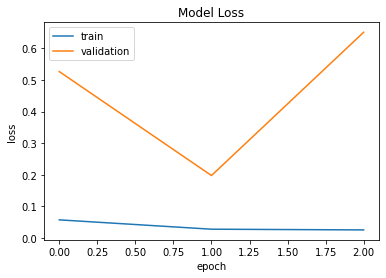

In [23]:
learner.plot('loss')

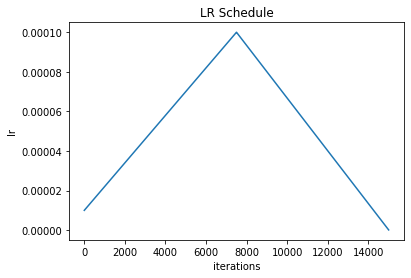

In [24]:
learner.plot('lr')

In [25]:
learner.validate()

470/470 [==============================] - 16s 32ms/step
              precision    recall  f1-score   support

           0       0.93      0.68      0.79       477
           1       0.89      0.98      0.94     10618
           2       0.90      0.69      0.78      3918

    accuracy                           0.90     15013
   macro avg       0.91      0.78      0.84     15013
weighted avg       0.90      0.90      0.89     15013



array([[  325,    18,   134],
       [   24, 10440,   154],
       [    0,  1216,  2702]])